<b><font size="6">Predictive Modelling Pipeline Template</font></b><br><br>

In this notebook we present to you the main steps you should follow throughout your project.


<b> Important: The numbered sections and subsections are merely indicative of some of the steps you should pay attention to in your project. <br>You are not required to strictly follow this order or to execute everything in separate cells.</b>
    
<img src="image/process_ML.png" style="height:70px">

# Pre-requisites

In [227]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/ML - LGI/Project_Unsupervised'

Mounted at /content/drive


In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
import seaborn as sns

sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import statistics
import missingno as mn

<a class="anchor" id="">

# 1. Import data (Data Integration)

</a>


In [229]:
df = pd.read_excel(path+'/data/Descriptive_Data.xlsx')
dfSuccess=pd.read_excel(path+'/data/Descriptive_Data.xlsx',sheet_name=1)

In [230]:
data=df.copy()
success=dfSuccess.copy()

In [231]:
data.set_index('Userid',inplace=True)
success.set_index('Userid',inplace=True)

<a class="anchor" id="">

# 2. Explore data (Data access, exploration and understanding)

</a>

In [232]:
data.head()

,Marital status,Application mode,Application order,Course,Morning shift participation,Previous qualification,Previous qualification score,Nationality,Mother's qualification,Father's qualification,...,N unscored units 1st period,N units credited 2nd period,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Registered,Observations
Userid,,,,,,,,,,,,,,,,,,,,,
699,single,0.0,1.0,Agronomy,1.0,12th grade - Technological specialization course,140.0,Portuguese,12th grade,6th grade,...,0.0,0.0,6.0,11.0,6.0,11.714286,0.0,70.0,Yes,NaN
456,married,0.0,1.0,Social Service (evening attendance),0.0,12th grade,130.0,Portuguese,NaN,NaN,...,0.0,1.0,6.0,15.0,2.0,11.000000,1.0,55.0,Yes,NaN
647,single,1.0,1.0,Social Service,1.0,12th grade,135.0,Portuguese,4th grade,12th grade,...,0.0,0.0,6.0,15.0,1.0,10.000000,0.0,67.0,Yes,NaN
383,single,1.0,1.0,Social Service,1.0,12th grade,135.0,Portuguese,6th grade,6th grade,...,0.0,0.0,6.0,12.0,3.0,10.333333,0.0,93.0,Yes,NaN
1217,single,2.0,4.0,Social Service,1.0,12th grade,124.0,Portuguese,9th grade,9th grade,...,0.0,0.0,6.0,11.0,NaN,12.000000,0.0,43.0,Yes,NaN


In [233]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Application mode,5851.0,0.887028,0.827345,0.0,0.00,1.000000,1.000000,3.000000
Application order,5853.0,1.739279,1.332602,0.0,1.00,1.000000,2.000000,9.000000
Morning shift participation,5845.0,0.891873,0.310567,0.0,1.00,1.000000,1.000000,1.000000
Previous qualification score,5972.0,132.659009,13.185271,95.0,125.00,133.100000,140.000000,190.000000
Entry score,5972.0,126.957585,14.522666,95.0,117.90,126.100000,134.800000,190.000000
Displaced,5852.0,0.553144,0.497210,0.0,0.00,1.000000,1.000000,1.000000
Special needs,5850.0,0.010940,0.104030,0.0,0.00,0.000000,0.000000,1.000000
Debtor,5856.0,0.114583,0.318546,0.0,0.00,0.000000,0.000000,1.000000
Regularized Fees,5855.0,0.878053,0.327253,0.0,1.00,1.000000,1.000000,1.000000
Gender_Male,5859.0,0.352620,0.477826,0.0,0.00,0.000000,1.000000,1.000000


## Numerical data distribution

In [234]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,Application mode,Application order,Morning shift participation,Previous qualification score,Entry score,Displaced,Special needs,Debtor,Regularized Fees,Gender_Male,...,Average grade 1st period,N unscored units 1st period,N units credited 2nd period,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Observations
Userid,,,,,,,,,,,,,,,,,,,,,
699,0.0,1.0,1.0,140.0,140.0,1.0,0.0,0.0,1.0,1.0,...,12.600000,0.0,0.0,6.0,11.0,6.0,11.714286,0.0,70.0,NaN
456,0.0,1.0,0.0,130.0,114.8,0.0,0.0,0.0,1.0,0.0,...,11.166667,0.0,1.0,6.0,15.0,2.0,11.000000,1.0,55.0,NaN
647,1.0,1.0,1.0,135.0,121.0,0.0,0.0,0.0,1.0,0.0,...,11.200000,0.0,0.0,6.0,15.0,1.0,10.000000,0.0,67.0,NaN
383,1.0,1.0,1.0,135.0,121.0,0.0,0.0,0.0,1.0,0.0,...,10.333333,0.0,0.0,6.0,12.0,3.0,10.333333,0.0,93.0,NaN
1217,2.0,4.0,1.0,124.0,117.7,1.0,0.0,0.0,1.0,0.0,...,12.000000,0.0,0.0,6.0,11.0,NaN,12.000000,0.0,43.0,NaN


In [235]:
# data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [236]:
data.head()

,Marital status,Application mode,Application order,Course,Morning shift participation,Previous qualification,Previous qualification score,Nationality,Mother's qualification,Father's qualification,...,N unscored units 1st period,N units credited 2nd period,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Registered,Observations
Userid,,,,,,,,,,,,,,,,,,,,,
699,single,0.0,1.0,Agronomy,1.0,12th grade - Technological specialization course,140.0,Portuguese,12th grade,6th grade,...,0.0,0.0,6.0,11.0,6.0,11.714286,0.0,70.0,Yes,NaN
456,married,0.0,1.0,Social Service (evening attendance),0.0,12th grade,130.0,Portuguese,NaN,NaN,...,0.0,1.0,6.0,15.0,2.0,11.000000,1.0,55.0,Yes,NaN
647,single,1.0,1.0,Social Service,1.0,12th grade,135.0,Portuguese,4th grade,12th grade,...,0.0,0.0,6.0,15.0,1.0,10.000000,0.0,67.0,Yes,NaN
383,single,1.0,1.0,Social Service,1.0,12th grade,135.0,Portuguese,6th grade,6th grade,...,0.0,0.0,6.0,12.0,3.0,10.333333,0.0,93.0,Yes,NaN
1217,single,2.0,4.0,Social Service,1.0,12th grade,124.0,Portuguese,9th grade,9th grade,...,0.0,0.0,6.0,11.0,NaN,12.000000,0.0,43.0,Yes,NaN


<Axes: >

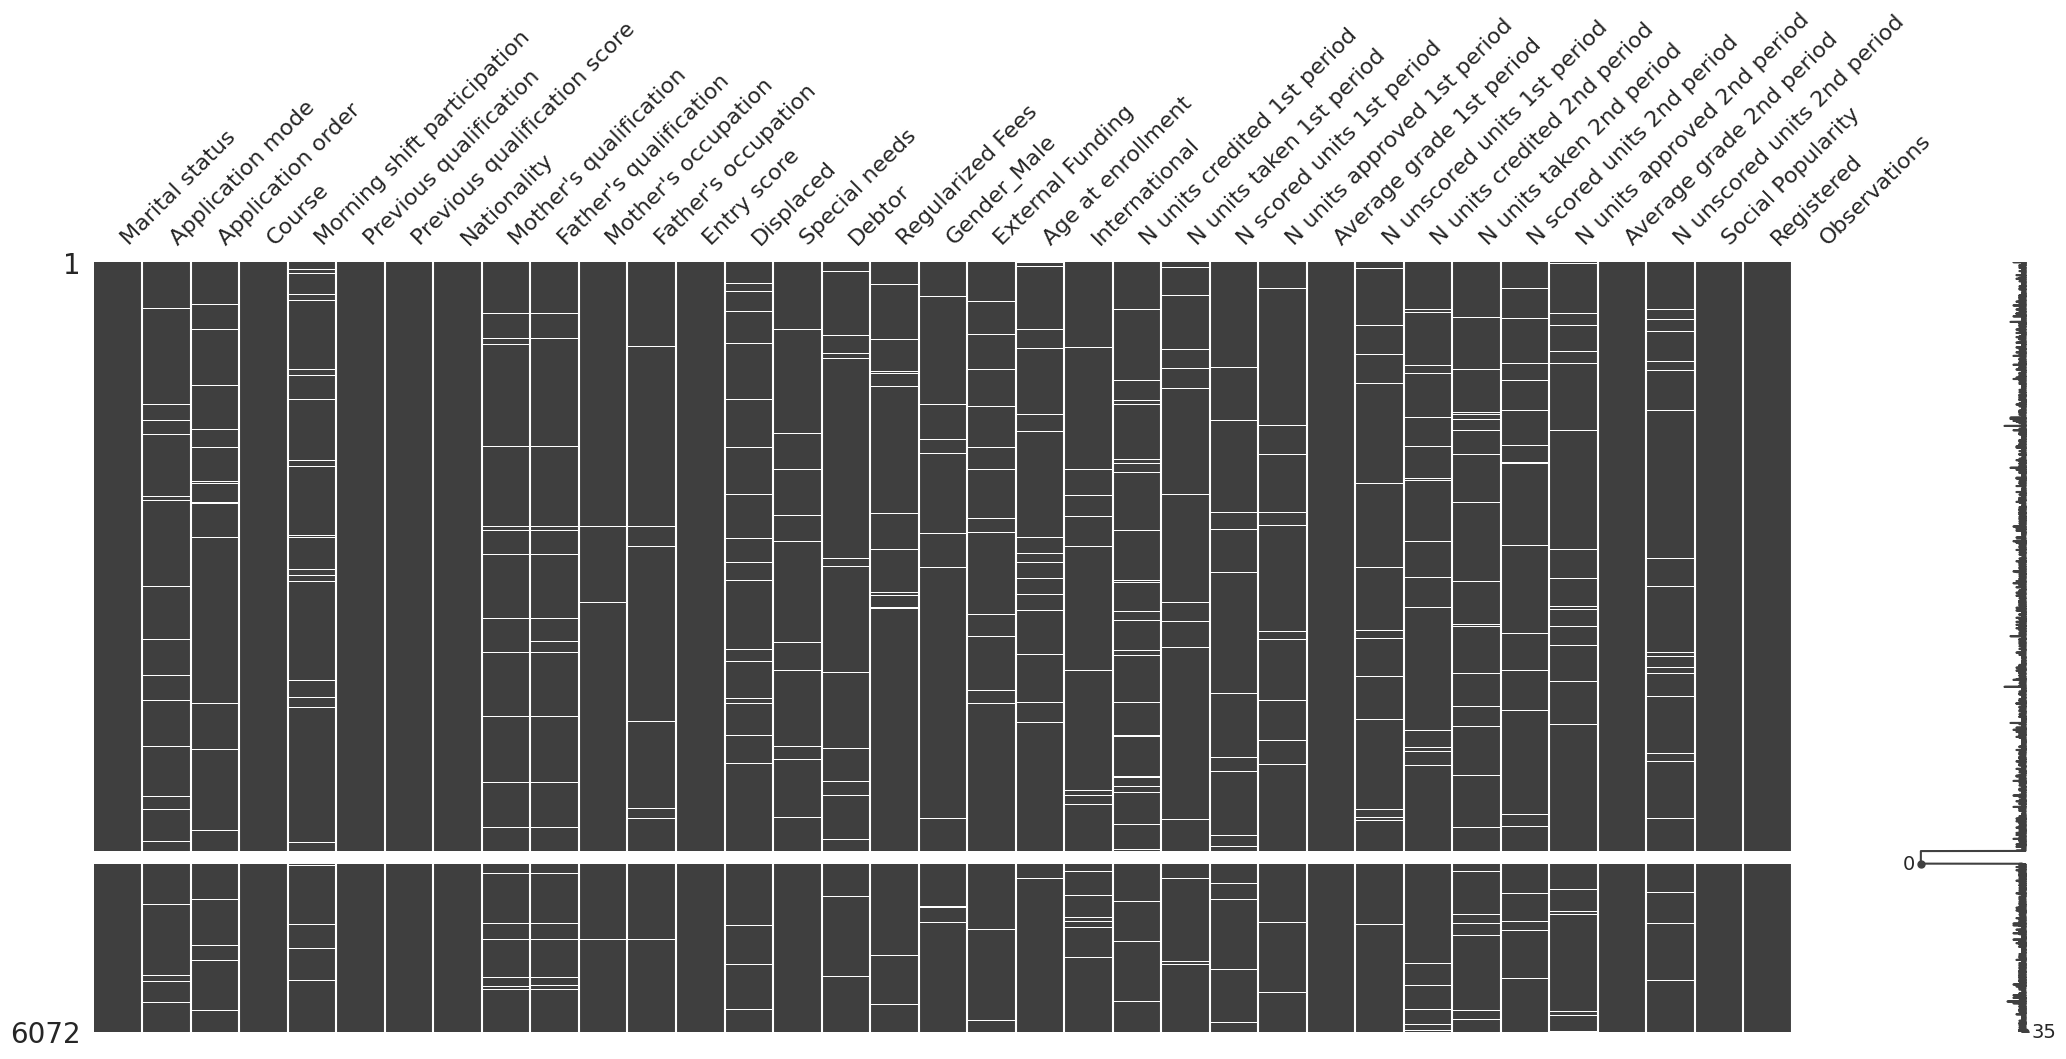

In [237]:
mn.matrix(data)

In [238]:
# percentage of empty values in a column
round(data.isnull().sum() / data.shape[0] * 100.00,2)

Marital status                    1.65
Application mode                  3.64
Application order                 3.61
Course                            1.65
Morning shift participation       3.74
Previous qualification            1.68
Previous qualification score      1.65
Nationality                       1.65
Mother's qualification            4.48
Father's qualification            4.17
Mother's occupation               2.04
Father's occupation               2.77
Entry score                       1.65
Displaced                         3.62
Special needs                     3.66
Debtor                            3.56
Regularized Fees                  3.57
Gender_Male                       3.51
External Funding                  3.52
Age at enrollment                 3.49
International                     3.54
N units credited 1st period       3.66
N units taken 1st period          3.59
N scored units 1st period         3.61
N units approved 1st period       3.69
Average grade 1st period 

In [239]:
value_counts=[]
categoricalFeatures=[column for column in data.columns if column not in data_num.columns]
for categoricalFeature in categoricalFeatures:
  value_counts.append(data[categoricalFeature].value_counts())
value_counts

[Marital status
 single               5296
 married               512
 divorced              121
 facto union            29
 legally separated       9
 widower                 5
 Name: count, dtype: int64,
 Course
 Nursing                                 1040
 Management                               521
 Social Service                           479
 Veterinary Nursing                       454
 Journalism and Communication             443
 Management (evening attendance)          363
 Advertising and Marketing Management     357
 Tourism                                  339
 Communication Design                     300
 Social Service (evening attendance)      293
 Animation and Multimedia Design          290
 Agronomy                                 286
 Basic Education                          255
 Informatics Engineering                  228
 Equinculture                             190
 Oral Hygiene                             116
 Biofuel Production Technologies           18
 Nam

<a class="anchor" id="">

# 3. Modify data (Data preparation)

</a>

### 3.1. Data Preparation

In [240]:
le = LabelEncoder()
le.fit(['Gave up','Holding on','Succeeded'])
success['Success']=le.transform(success['Success'])

#### 3.1.1 Dealing with missing values

In [241]:
data.drop('Observations',axis=1,inplace=True)
data.drop('Nationality',axis=1,inplace=True)
data.drop('Registered',axis=1,inplace=True)

In [242]:
# data.dropna(subset=['Success'], how='all',inplace=True)

Replacing missing categorical values with the mode

In [243]:
categoricalFeatures=['Application mode','Application order','Marital status','Course','Morning shift participation','Previous qualification', 'Mother\'s qualification','Father\'s qualification',
                         'Mother\'s occupation', 'Father\'s occupation','Displaced', 'Special needs', 'Debtor','Regularized Fees', 'Gender_Male', 'External Funding',
                         'International']

In [244]:
def calculate_mode(feature):
  return data[feature].mode()[0]

In [245]:
mode_values=[calculate_mode(feature) for feature in categoricalFeatures]
mode_values

[1.0,
 1.0,
 'single',
 'Nursing',
 1.0,
 '12th grade',
 '12th grade',
 '4th grade',
 'Unskilled Worker',
 'Unskilled Worker',
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0]

In [246]:
for i in range (0,len(categoricalFeatures)):
  data[categoricalFeatures[i]]=data[categoricalFeatures[i]].fillna(mode_values[i])

Replace missing metric features with the median

In [247]:
def calculate_median(feature):
  return np.nanmedian(data[feature])

In [248]:
metricFeatures=['Previous qualification score','Entry score','Age at enrollment','N units credited 1st period',
                   'N units taken 1st period', 'N scored units 1st period','N units approved 1st period', 'Average grade 1st period','N unscored units 1st period',
                   'N units credited 2nd period','N units taken 2nd period', 'N scored units 2nd period','N units approved 2nd period', 'Average grade 2nd period',
                   'N unscored units 2nd period', 'Social Popularity']

median_values=[calculate_median(feature) for feature in metricFeatures]

for i in range (0,len(metricFeatures)):
  data[metricFeatures[i]]=data[metricFeatures[i]].fillna(median_values[i])

In [249]:
data.isna().sum()

Marital status                  0
Application mode                0
Application order               0
Course                          0
Morning shift participation     0
Previous qualification          0
Previous qualification score    0
Mother's qualification          0
Father's qualification          0
Mother's occupation             0
Father's occupation             0
Entry score                     0
Displaced                       0
Special needs                   0
Debtor                          0
Regularized Fees                0
Gender_Male                     0
External Funding                0
Age at enrollment               0
International                   0
N units credited 1st period     0
N units taken 1st period        0
N scored units 1st period       0
N units approved 1st period     0
Average grade 1st period        0
N unscored units 1st period     0
N units credited 2nd period     0
N units taken 2nd period        0
N scored units 2nd period       0
N units approv

#### 3.1.2 Grouping of features

Mother's and father's occupation has a lot of values that appear just a few times, they can be calculated as Other

In [250]:
relevantOccupations=['Unskilled Worker','Administrative Staff','Private Security','Engineer','Superior-level Professional',
            'Scientist','Student','Politician/CEO','Assembly Worker','Armed Forces']

data.loc[~data['Father\'s occupation'].isin(relevantOccupations), 'Father\'s occupation'] = 'Other'
data.loc[~data['Mother\'s occupation'].isin(relevantOccupations), 'Mother\'s occupation'] = 'Other'

In [251]:
education={
  '12th grade':'Middle',
  '9th grade':'Middle',
  '11th grade':'Middle',
  '12th grade - Technological specialization course':'Middle',
  '10th grade':'Middle',
  '12th grade - Technical-professional course':'Middle',
  '4th grade':'Lower',
  '6th grade':'Lower',
  '8th grade':'Lower',
  '3rd grade':'Lower',
  'Bachelor degree':'Higher',
  'Master degree':'Higher',
  'PhD':'Higher',
  'Post-Graduation':'Higher',
  'Incomplete Bachelor\'s':'Higher',
  'No School': 'None'
}

data['Father\'s qualification'].replace(education,inplace=True)

data['Mother\'s qualification'].replace(education,inplace=True)

data['Previous qualification'].replace(education,inplace=True)

In [252]:
marriage={
    'single':'alone',
    'divorced':'alone',
    'legally separated':'alone',
    'widower':'alone',
    'married':'together',
    'facto union':'together'
}
data['Marital status'].replace(marriage,inplace=True)

In [253]:
course = {
    'Journalism and Communication': 'Humanities',
    'Communication Design': 'Humanities',
    'Animation and Multimedia Design': 'Humanities',
    'Basic Education': 'Humanities',
    "Oral Hygiene": 'Humanities',
    'Nursing': 'STEM',
    'Veterinary Nursing': 'STEM',
    'Management': 'STEM',
    'Management (evening attendance)': 'STEM',
    'Advertising and Marketing Management': 'STEM',
    'Informatics Engineering': 'STEM',
    'Agronomy': 'STEM',
    'Equinculture': 'STEM',
    'Biofuel Production Technologies': 'STEM',
    'Social Service': 'Business and Social Services',
    'Social Service (evening attendance)': 'Business and Social Services',
    'Tourism': 'Business and Social Services'
}

data['Course'].replace(course,inplace=True)

In [254]:
data.head()

,Marital status,Application mode,Application order,Course,Morning shift participation,Previous qualification,Previous qualification score,Mother's qualification,Father's qualification,Mother's occupation,...,N units approved 1st period,Average grade 1st period,N unscored units 1st period,N units credited 2nd period,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity
Userid,,,,,,,,,,,,,,,,,,,,,
699,alone,0.0,1.0,STEM,1.0,Middle,140.0,Middle,Lower,Unskilled Worker,...,5.0,12.600000,0.0,0.0,6.0,11.0,6.0,11.714286,0.0,70.0
456,together,0.0,1.0,Business and Social Services,0.0,Middle,130.0,Middle,Lower,Unskilled Worker,...,6.0,11.166667,0.0,1.0,6.0,15.0,2.0,11.000000,1.0,55.0
647,alone,1.0,1.0,Business and Social Services,1.0,Middle,135.0,Lower,Middle,Superior-level Professional,...,5.0,11.200000,0.0,0.0,6.0,15.0,1.0,10.000000,0.0,67.0
383,alone,1.0,1.0,Business and Social Services,1.0,Middle,135.0,Lower,Lower,Private Security,...,3.0,10.333333,0.0,0.0,6.0,12.0,3.0,10.333333,0.0,93.0
1217,alone,2.0,4.0,Business and Social Services,1.0,Middle,124.0,Middle,Middle,Private Security,...,5.0,12.000000,0.0,0.0,6.0,11.0,5.0,12.000000,0.0,43.0


In [255]:
dataPreScale = data.copy(deep=True)

#### 3.1.3 OneHot encoding

In [256]:
dataPreOneHot=data.copy(deep=True)

In [257]:
data=pd.get_dummies(data)

### 3.2. Feature Engineering

In [258]:
data['Average grades']=(data['Average grade 1st period']+data['Average grade 2nd period'])/2
data['Average units taken']=(data['N units taken 1st period']+data['N units taken 2nd period'])/2
data['Average scored units']=(data['N scored units 1st period']+data['N scored units 2nd period'])/2
data['Average units approved']=(data['N units approved 1st period']+data['N units approved 2nd period'])/2
data['Average units credited']=(data['N units credited 1st period']+data['N units credited 2nd period'])/2
data['Average unscored units']=(data['N unscored units 1st period']+data['N unscored units 2nd period'])/2

data['Unit load']=data['N units credited 1st period']+data['N units credited 2nd period']

In [259]:
metricFeatures.append('Average grades')
metricFeatures.append('Average units taken')
metricFeatures.append('Average scored units')
metricFeatures.append('Average units approved')
metricFeatures.append('Average units credited')
metricFeatures.append('Average unscored units')
metricFeatures.append('Unit load')

### 3.3. Scaling

In [260]:
scaler=MinMaxScaler().fit(data)
minMaxScaleTrain=scaler.transform(data)

data=pd.DataFrame(minMaxScaleTrain,columns=data.columns,index=data.index)

In [261]:
# data[academicData].head()

In [262]:
academicData=['Entry score','Average scored units','Average grades','Average units taken','Average units approved','Average units credited','Average unscored units']
dataAcademic=data[academicData]
dataAcademic=dataAcademic.join(success,on='Userid')


In [263]:
data.head()

,Application mode,Application order,Morning shift participation,Previous qualification score,Entry score,Displaced,Special needs,Debtor,Regularized Fees,Gender_Male,...,Father's occupation_Student,Father's occupation_Superior-level Professional,Father's occupation_Unskilled Worker,Average grades,Average units taken,Average scored units,Average units approved,Average units credited,Average unscored units,Unit load
Userid,,,,,,,,,,,,,,,,,,,,,
699,0.000000,0.111111,1.0,0.473684,0.473684,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.664919,0.26087,0.319444,0.275,0.000000,0.000000,0.000000
456,0.000000,0.111111,0.0,0.368421,0.208421,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.606188,0.26087,0.333333,0.200,0.025641,0.041667,0.025641
647,0.333333,0.111111,1.0,0.421053,0.273684,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.579753,0.26087,0.361111,0.150,0.000000,0.000000,0.000000
383,0.333333,0.111111,1.0,0.421053,0.273684,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.565168,0.26087,0.347222,0.150,0.000000,0.000000,0.000000
1217,0.666667,0.444444,1.0,0.305263,0.238947,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.656324,0.26087,0.291667,0.250,0.000000,0.000000,0.000000


In [264]:
dataAcademic.head()

,Entry score,Average scored units,Average grades,Average units taken,Average units approved,Average units credited,Average unscored units,Success
Userid,,,,,,,,
699,0.473684,0.319444,0.664919,0.26087,0.275,0.000000,0.000000,2
699,0.473684,0.319444,0.664919,0.26087,0.275,0.000000,0.000000,2
456,0.208421,0.333333,0.606188,0.26087,0.200,0.025641,0.041667,2
647,0.273684,0.361111,0.579753,0.26087,0.150,0.000000,0.000000,1
647,0.273684,0.361111,0.579753,0.26087,0.150,0.000000,0.000000,1


In [265]:
sns.pairplot(dataAcademic)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b4763019000> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b4763018280> (for post_execute):


KeyboardInterrupt: 

# Clustering academic perspective

In [50]:
!pip install git+https://github.com/sevamoo/SOMPY.git #egg=SOMPY
!pip install scikit-image

  Cloning https://github.com/sevamoo/SOMPY.git to /tmp/pip-req-build-olqjhe9t
  Running command git clone --filter=blob:none --quiet https://github.com/sevamoo/SOMPY.git /tmp/pip-req-build-olqjhe9t
  Resolved https://github.com/sevamoo/SOMPY.git to commit 6aca604b06e5eea1391ecf507810c7aabafc3f8b
  Preparing metadata (setup.py) ... done
  Created wheel for SOMPY: filename=SOMPY-1.1.1-py3-none-any.whl size=29177 sha256=1065c6d36bb3add3ec4f3f2f26f544fd139d35d1b71ebd0ba0647218a75cd403
  Stored in directory: /tmp/pip-ephem-wheel-cache-ovrul032/wheels/88/5c/6c/4f6b658484ba3ae52ed93a9ffa0e4d54cbfb3f4e2624b6fdc0
Successfully built SOMPY


In [51]:
import sompy
from sompy.sompy import SOMFactory

In [231]:
df_som = np.float32(dataAcademic.values)

In [232]:
rows = 25
cols = 25
mapsize = [rows, cols]

In [233]:
som = SOMFactory().build(df_som, mapsize, mask=None,
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [234]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

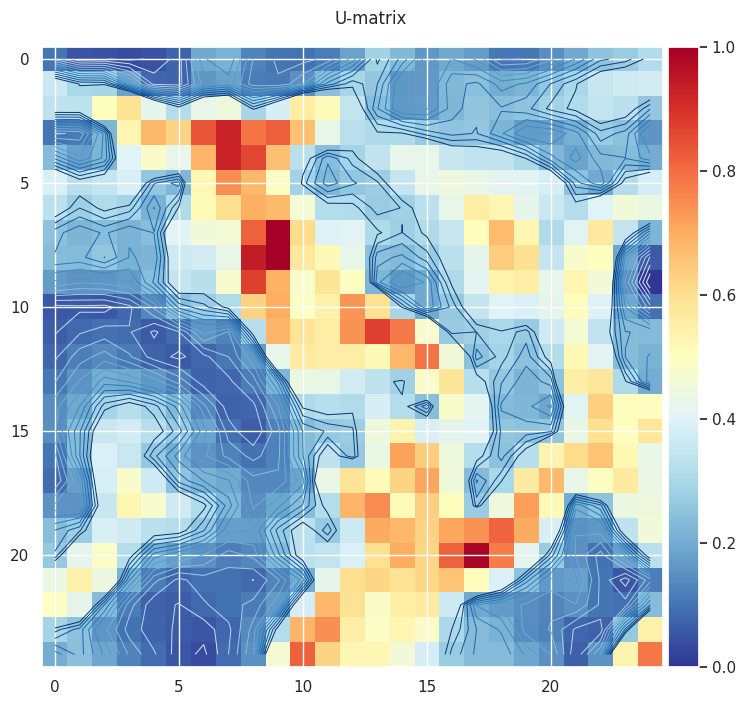

In [235]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

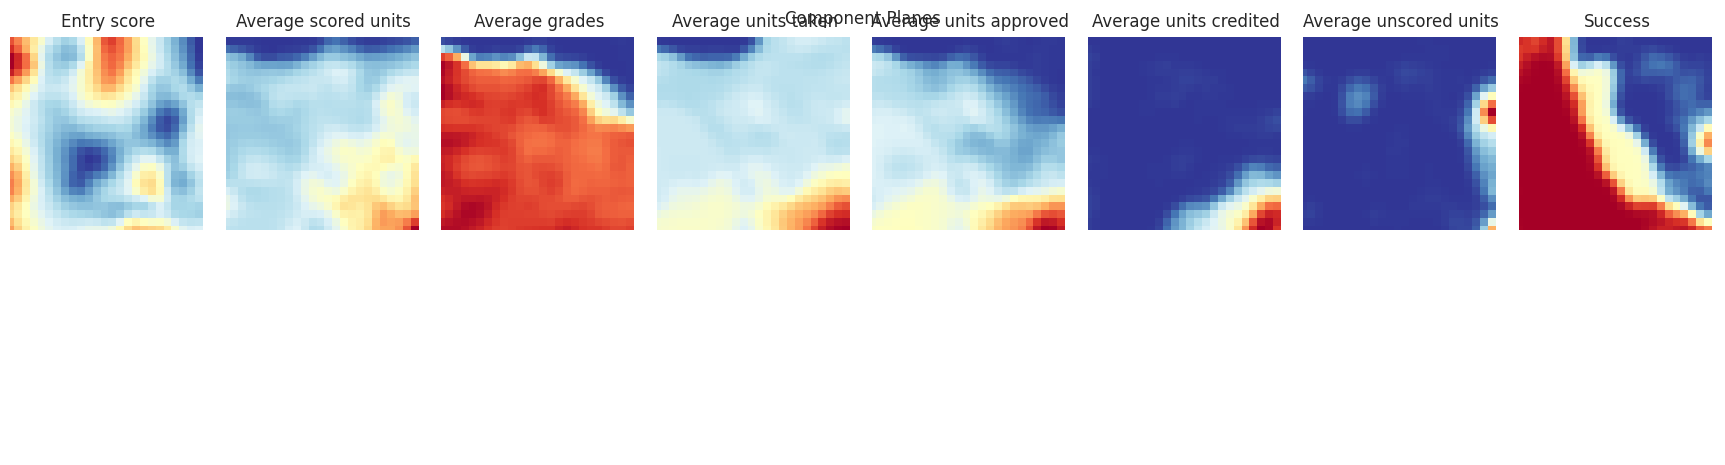

In [236]:
som.component_names = dataAcademic.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)
comp_planes.show(som, what='codebook', which_dim='all', col_sz=8)

In [237]:
bmus = som.project_data(dataAcademic)
bmus

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([525, 525, 461, ..., 204, 380, 602])

In [238]:
cl = som.cluster(n_clusters=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [239]:
labels = getattr(som, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0,

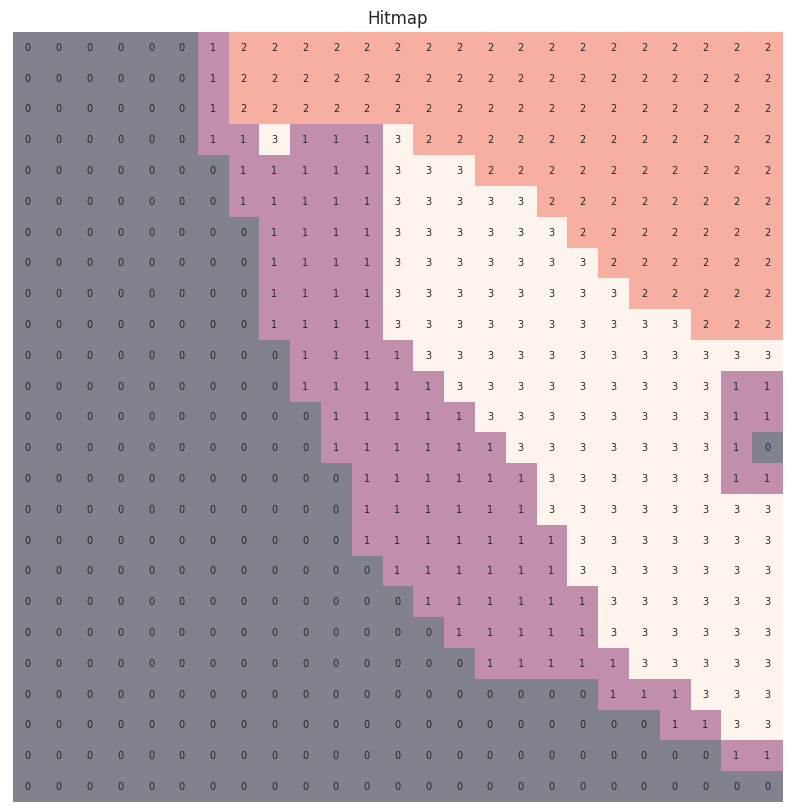

In [240]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)
print("kek")

In [241]:
bmus = som.project_data(df_som)
dataAcademic['bmu'] = bmus

In [242]:
dataAcademic['label'] = labels[dataAcademic['bmu']]

In [243]:
dataAcademic.head()

,Entry score,Average scored units,Average grades,Average units taken,Average units approved,Average units credited,Average unscored units,Success,bmu,label
Userid,,,,,,,,,,
699,0.473684,0.319444,0.664919,0.26087,0.275,0.000000,0.000000,2,525,0
699,0.473684,0.319444,0.664919,0.26087,0.275,0.000000,0.000000,2,525,0
456,0.208421,0.333333,0.606188,0.26087,0.200,0.025641,0.041667,2,461,0
647,0.273684,0.361111,0.579753,0.26087,0.150,0.000000,0.000000,1,365,1
647,0.273684,0.361111,0.579753,0.26087,0.150,0.000000,0.000000,1,365,1


In [244]:
df_final = dataPreScale.copy(deep=True)
# df_final.set_index('Userid',inplace=True)
df_final=df_final.join(success,on='Userid')
df_final['label'] = dataAcademic['label']

In [248]:
academicData.append('Success')

In [250]:
descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[academicData].describe().T
descr

label                                   0            1            2  \
Entry score            count  4555.000000  1506.000000  1606.000000   
                       mean    129.137673   125.195352   125.104234   
                       std      14.457713    12.228629    15.850167   
                       min      95.000000    95.000000    95.000000   
                       25%     119.900000   117.800000   115.000000   
                       50%     127.500000   124.850000   123.300000   
                       75%     136.700000   132.975000   133.300000   
                       max     190.000000   170.000000   183.500000   
Average scored units   count  4555.000000  1506.000000  1606.000000   
                       mean      8.163776     9.770584     5.090909   
                       std       3.362564     3.391213     4.065448   
                       min       0.000000     0.000000     0.000000   
                       25%       6.500000     8.000000     0.000000   
                       50%       8.000000     9.500000     5.500000   
                       75%       9.000000    11.000000     8.000000   
                       max      36.000000    27.500000    18.000000   
Average grades         count  4555.000000  1506.000000  1606.000000   
                       mean     12.634740    11.893195     1.426881   
                       std       2.781225     2.111535     2.589995   
                       min       0.000000     0.000000     0.000000   
                       25%      12.242857    11.435937     0.000000   
                       50%      12.993750    12.106012     0.000000   
                       75%      13.895833    12.766458     0.000000   
                       max      18.283654    17.000000    13.670000   
Average units taken    count  4555.000000  1506.000000  1606.000000   
                       mean      6.623930     6.109562     5.062889   
                       std       2.461776     1.940292     1.872102   
                       min       0.000000     0.000000     0.000000   
                       25%       6.000000     5.000000     5.000000   
                       50%       6.000000     6.000000     5.500000   
                       75%       7.500000     6.000000     6.000000   
                       max      23.000000    18.500000     8.000000   
Average units approved count  4555.000000  1506.000000  1606.000000   
                       mean      6.154446     4.656042     0.367061   
                       std       2.349329     2.026786     0.766457   
                       min       0.000000     0.000000     0.000000   
                       25%       5.000000     3.500000     0.000000   
                       50%       6.000000     4.500000     0.000000   
                       75%       7.000000     5.500000     0.500000   
                       max      20.000000    16.500000     4.000000   
Average units credited count  4555.000000  1506.000000  1606.000000   
                       mean      0.744347     0.493028     0.006849   
                       std       2.414117     1.833189     0.068014   
                       min       0.000000     0.000000     0.000000   
                       25%       0.000000     0.000000     0.000000   
                       50%       0.000000     0.000000     0.000000   
                       75%       0.000000     0.000000     0.000000   
                       max      19.500000    15.000000     1.000000   
Average unscored units count  4555.000000  1506.000000  1606.000000   
                       mean      0.075631     0.171315     0.306663   
                       std       0.539542     0.516377     1.160411   
                       min       0.000000     0.000000     0.000000   
                       25%       0.000000     0.000000     0.000000   
                       50%       0.000000     0.000000     0.000000   
                       75%       0.000000     0.000000     0.000000   
                       m

In [40]:
data.columns

Index(['Application mode', 'Application order', 'Morning shift participation',
       'Previous qualification score', 'Entry score', 'Displaced',
       'Special needs', 'Debtor', 'Regularized Fees', 'Gender_Male',
       'External Funding', 'Age at enrollment', 'International',
       'N units credited 1st period', 'N units taken 1st period',
       'N scored units 1st period', 'N units approved 1st period',
       'Average grade 1st period', 'N unscored units 1st period',
       'N units credited 2nd period', 'N units taken 2nd period',
       'N scored units 2nd period', 'N units approved 2nd period',
       'Average grade 2nd period', 'N unscored units 2nd period',
       'Social Popularity', 'Marital status_alone', 'Marital status_together',
       'Course_Business and Social Services', 'Course_Humanities',
       'Course_STEM', 'Previous qualification_Higher',
       'Previous qualification_Lower', 'Previous qualification_Middle',
       'Mother's qualification_12th grade - Comme

# Clustering demographic traits

In [266]:
data.columns

Index(['Application mode', 'Application order', 'Morning shift participation',
       'Previous qualification score', 'Entry score', 'Displaced',
       'Special needs', 'Debtor', 'Regularized Fees', 'Gender_Male',
       'External Funding', 'Age at enrollment', 'International',
       'N units credited 1st period', 'N units taken 1st period',
       'N scored units 1st period', 'N units approved 1st period',
       'Average grade 1st period', 'N unscored units 1st period',
       'N units credited 2nd period', 'N units taken 2nd period',
       'N scored units 2nd period', 'N units approved 2nd period',
       'Average grade 2nd period', 'N unscored units 2nd period',
       'Social Popularity', 'Marital status_alone', 'Marital status_together',
       'Course_Business and Social Services', 'Course_Humanities',
       'Course_STEM', 'Previous qualification_Higher',
       'Previous qualification_Lower', 'Previous qualification_Middle',
       'Mother's qualification_12th grade - Comme

In [267]:
# demographicData=['Marital status','Mother\'s qualification','Father\'s qualification','Mother\'s occupation','Father\'s occupation','Gender_Male','Age at enrollment','International']
demographicData=['Age at enrollment','Special needs','Displaced', 'Debtor','Regularized Fees',
                 'Gender_Male','External Funding','International']
# demographicData=['Marital status','Mother\'s qualification','Father\'s qualification','Gender_Male','Age at enrollment','International']
dataDemographic=dataPreOneHot[demographicData]

In [268]:
dataDemographic.head()

,Age at enrollment,Special needs,Displaced,Debtor,Regularized Fees,Gender_Male,External Funding,International
Userid,,,,,,,,
699,22.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
456,44.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
647,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
383,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1217,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [269]:
dataDemographic=pd.get_dummies(dataDemographic)

In [270]:
dataDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6072 entries, 699 to 1292
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age at enrollment  6072 non-null   float64
 1   Special needs      6072 non-null   float64
 2   Displaced          6072 non-null   float64
 3   Debtor             6072 non-null   float64
 4   Regularized Fees   6072 non-null   float64
 5   Gender_Male        6072 non-null   float64
 6   External Funding   6072 non-null   float64
 7   International      6072 non-null   float64
dtypes: float64(8)
memory usage: 426.9 KB


In [271]:
# numeric_columns = dataDemographic.select_dtypes(include=['float64', 'int64']).columns
# sns.pairplot(dataDemographic[numeric_columns].sample(1000))

In [272]:
# sns.pairplot(dataDemographic.sample(1000))

In [273]:
df_som = np.float32(dataDemographic.values)

In [274]:
rows = 25
cols = 25
mapsize = [rows, cols]

In [275]:
som = SOMFactory().build(df_som, mapsize, mask=None,
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [276]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

/usr/local/lib/python3.10/dist-packages/sompy/sompy.py:357: RuntimeWarning: invalid value encountered in sqrt
  bmu[1] = np.sqrt(bmu[1] + fixed_euclidean_x2)


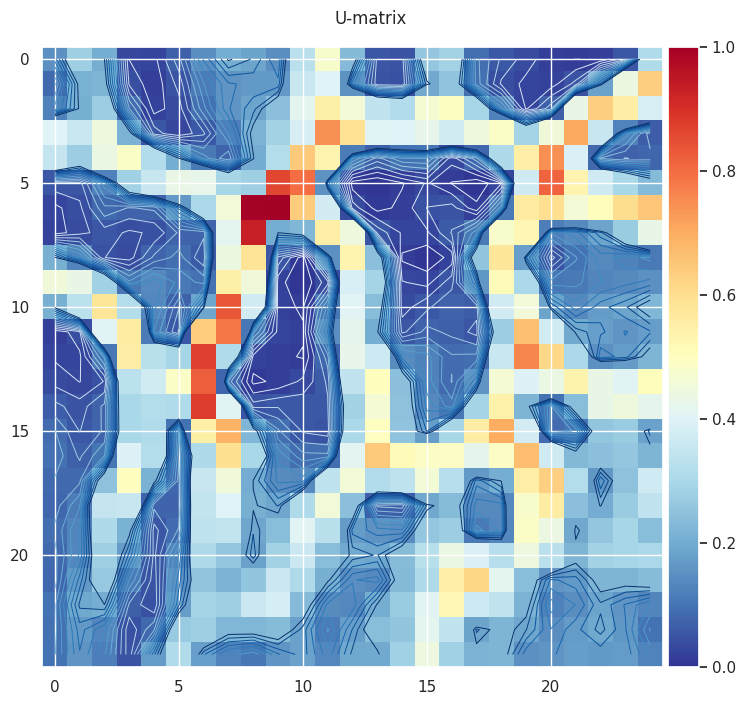

In [277]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

In [278]:
bmus = som.project_data(dataDemographic)
bmus

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([385, 579, 179, ..., 525,  69, 300])

In [279]:
cl = som.cluster(n_clusters=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [280]:
labels = getattr(som, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,

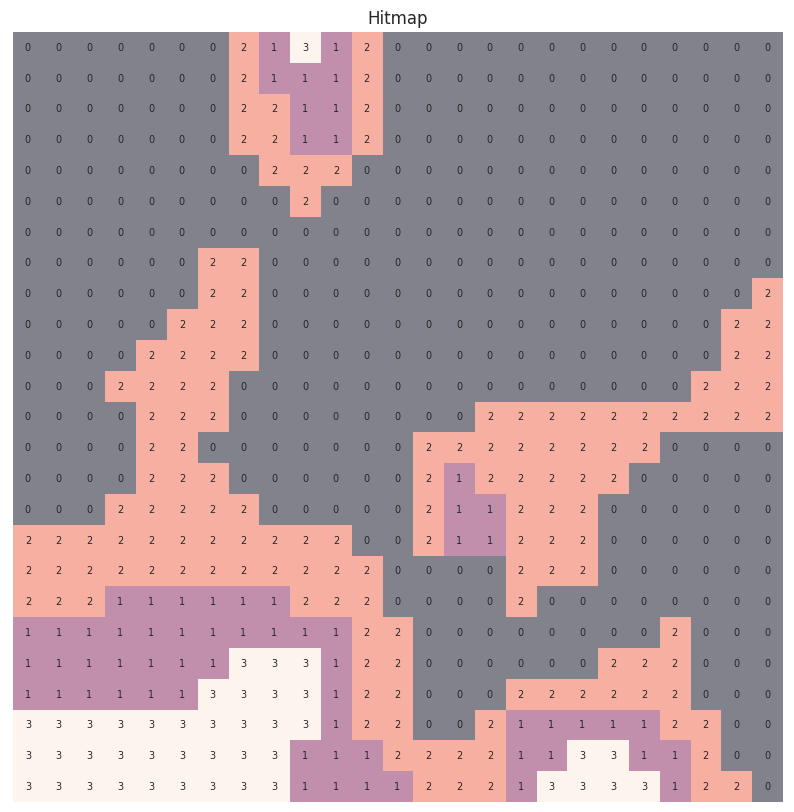

In [281]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [282]:
bmus = som.project_data(df_som)
dataDemographic['bmu'] = bmus

In [283]:
dataDemographic['label'] = labels[dataDemographic['bmu']]

In [284]:
dataDemographic.head()

,Age at enrollment,Special needs,Displaced,Debtor,Regularized Fees,Gender_Male,External Funding,International,bmu,label
Userid,,,,,,,,,,
699,22.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,385,0
456,44.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,579,3
647,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,179,0
383,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,202,0
1217,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,142,0


In [288]:
dataDemographic.columns

Index(['Age at enrollment', 'Special needs', 'Displaced', 'Debtor',
       'Regularized Fees', 'Gender_Male', 'External Funding', 'International',
       'bmu', 'label'],
      dtype='object')

In [290]:
df_final.drop_duplicates(inplace=True)
dataDemographic.drop_duplicates(inplace=True)

In [291]:
df_final = dataPreScale.copy(deep=True)
# df_final.set_index('Userid',inplace=True)
df_final=df_final.join(success,on='Userid')
df_final['label'] = dataDemographic['label']

In [294]:
df_final.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Morning shift participation', 'Previous qualification',
       'Previous qualification score', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Entry score', 'Displaced', 'Special needs', 'Debtor',
       'Regularized Fees', 'Gender_Male', 'External Funding',
       'Age at enrollment', 'International', 'N units credited 1st period',
       'N units taken 1st period', 'N scored units 1st period',
       'N units approved 1st period', 'Average grade 1st period',
       'N unscored units 1st period', 'N units credited 2nd period',
       'N units taken 2nd period', 'N scored units 2nd period',
       'N units approved 2nd period', 'Average grade 2nd period',
       'N unscored units 2nd period', 'Social Popularity', 'Success', 'label'],
      dtype='object')

In [292]:
demographicData.append('Success')

In [293]:
descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[demographicData].describe().T
descr

label                           0.0         1.0         2.0         3.0
Age at enrollment count  485.000000  245.000000  426.000000  240.000000
                  mean    21.808247   35.546939   26.370892   48.358333
                  std      4.192468    3.391594    5.248955    6.017820
                  min     17.000000   28.000000   18.000000   39.000000
                  25%     19.000000   33.000000   23.000000   43.000000
...                             ...         ...         ...         ...
Success           min      0.000000    0.000000    0.000000    0.000000
                  25%      0.000000    0.000000    0.000000    0.000000
                  50%      1.000000    0.000000    0.000000    0.000000
                  75%      2.000000    2.000000    1.000000    2.000000
                  max      2.000000    2.000000    2.000000    2.000000

[72 rows x 4 columns]